In [3]:
import sys
sys.path.append('../../sparsedense/')

import numpy as np
np.random.seed(179264)
import matplotlib.pyplot as plt
import matplotlib.cm
import matplotlib.colors
%matplotlib inline
import networkx as nx
from networkx.algorithms import community
import pickle
from matplotlib import patches

import sparsedensefast as sd
import helpertests as tst

In [111]:
def draw_adjacency_matrix(A, node_order=None, partitions=[], colors=[], size=5):
    """
    - A adjacency matrix (square symmetric)
    - node_order (optional) is a list of nodes, where each node in G
          appears exactly once
    - partitions is a list of node lists, where each node in G appears
          in exactly one node list
    - colors is a list of strings indicating what color each
          partition should be
    If partitions is specified, the same number of colors needs to be
    specified.
    """
    idx = node_order
    adjacency_matrix = A.astype(bool)[idx, idx]

    #Plot adjacency matrix in toned-down black and white
    fig = plt.figure(figsize=(size, size)) # in inches
    plt.imshow(adjacency_matrix,
                  cmap="Greys",
                  interpolation="none")

    # The rest is just if you have sorted nodes by a partition and want to
    # highlight the module boundaries
    assert len(partitions) == len(colors)
    ax = plt.gca()
    for partition, color in zip(partitions, colors):
        current_idx = 0
        for module in partition:
            ax.add_patch(patches.Rectangle((current_idx, current_idx),
                                          len(module), # Width
                                          len(module), # Height
                                          facecolor="none",
                                          edgecolor=color,
                                          linewidth="1"))
            current_idx += len(module)

In [20]:
links = np.genfromtxt('../../data/nips.tsv', dtype=int)
links.sort()
links_rcc = np.genfromtxt('../../experiments/nips/rcc_runs/0.tsv', dtype=int)
links_rcc.sort()
links_bnp = np.genfromtxt('../../experiments/nips/bnpgraph_runs/nips_1.tsv', dtype=int)
links_bnp.sort()
links_kron = np.genfromtxt('../../experiments/nips/krongen_runs/nips_01.tsv', dtype=int)
links_kron.sort()

In [13]:
g = nx.from_edgelist(links)
g_rcc = nx.from_edgelist(links_rcc)
g_bnp = nx.from_edgelist(links_bnp)
g_kron = nx.from_edgelist(links_kron)

In [146]:
tst.test_stats(g)

- num nodes: 2715
- num edges: 4733
- edge node ratio: 1.74
- density: 0.001285
- mean degree: 3.49
- clustering coefficient: 0.61
- mean maximal clique containing node: 3.46
- connected component sizes (top 5): [1771, 37, 13, 12, 11]
- mean distance between nodes (largest conn. comp.): 6.53


In [147]:
tst.test_stats(g_rcc)

- num nodes: 2542
- num edges: 5075
- edge node ratio: 2.00
- density: 0.001571
- mean degree: 3.99
- clustering coefficient: 0.70
- mean maximal clique containing node: 3.94
- connected component sizes (top 5): [1973, 16, 9, 8, 7]
- mean distance between nodes (largest conn. comp.): 6.09


In [148]:
tst.test_stats(g_bnp)

- num nodes: 2757
- num edges: 4900
- edge node ratio: 1.78
- density: 0.001290
- mean degree: 3.55
- clustering coefficient: 0.00
- mean maximal clique containing node: 2.02
- connected component sizes (top 5): [2699, 4, 3, 3, 3]
- mean distance between nodes (largest conn. comp.): 5.55


In [149]:
tst.test_stats(g_kron)

- num nodes: 1555
- num edges: 5894
- edge node ratio: 3.79
- density: 0.004878
- mean degree: 7.58
- clustering coefficient: 0.07
- mean maximal clique containing node: 2.49
- connected component sizes (top 5): [1553, 2]
- mean distance between nodes (largest conn. comp.): 3.24


## Default ordering

In [21]:
adjmat_size = 100
palette = 'binary'
# matplotlib.colors.LinearSegmentedColormap.from_list('mypalette',)

In [22]:
adj = nx.adjacency_matrix(g)
adj_rcc = nx.adjacency_matrix(g_rcc)
adj_bnp = nx.adjacency_matrix(g_bnp)
adj_kron = nx.adjacency_matrix(g_kron)

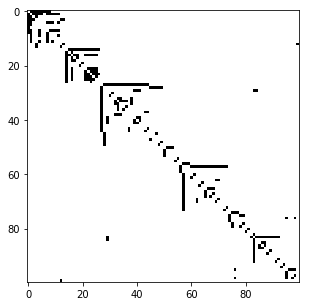

In [34]:
# plt.figure()
# plt.imshow(1 - adj.todense()[:adjmat_size, :adjmat_size], cmap=palette)
# plt.show()
A = adj.todense()[:adjmat_size, :adjmat_size]
draw_adjacency_matrix(A)

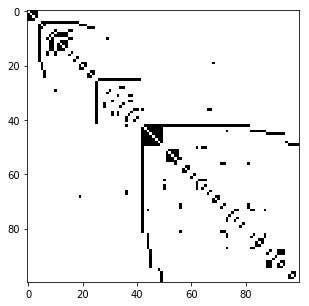

In [35]:
A = adj_rcc.todense()[:adjmat_size, :adjmat_size]
draw_adjacency_matrix(A)

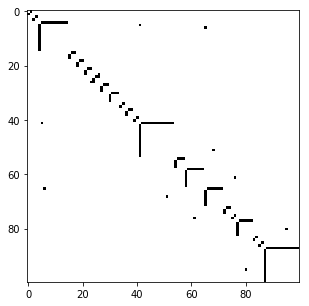

In [28]:
A = adj_bnp.todense()[:adjmat_size, :adjmat_size]
draw_adjacency_matrix(A)

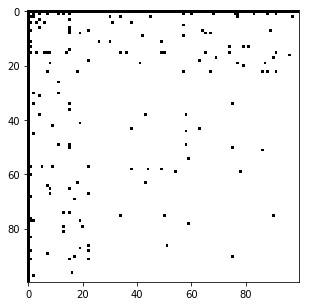

In [29]:
A = adj_kron.todense()[:adjmat_size, :adjmat_size]
draw_adjacency_matrix(A)

## Using communities (slow...)

In [45]:
communities_generator = community.girvan_newman(g)
nodeslist = sorted([x for x in next(communities_generator)], key=len, reverse=True)
nodes = []
for x in nodeslist:
    nodes.extend(x)

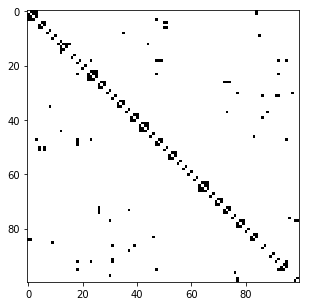

In [100]:
adj_2 = nx.adjacency_matrix(g, nodelist=nodes)

A = adj_2.todense()[:adjmat_size,:adjmat_size]
draw_adjacency_matrix(A)
# plt.axis('off')
plt.savefig("nips_adjmat_zoom.png",  bbox_inches='tight')

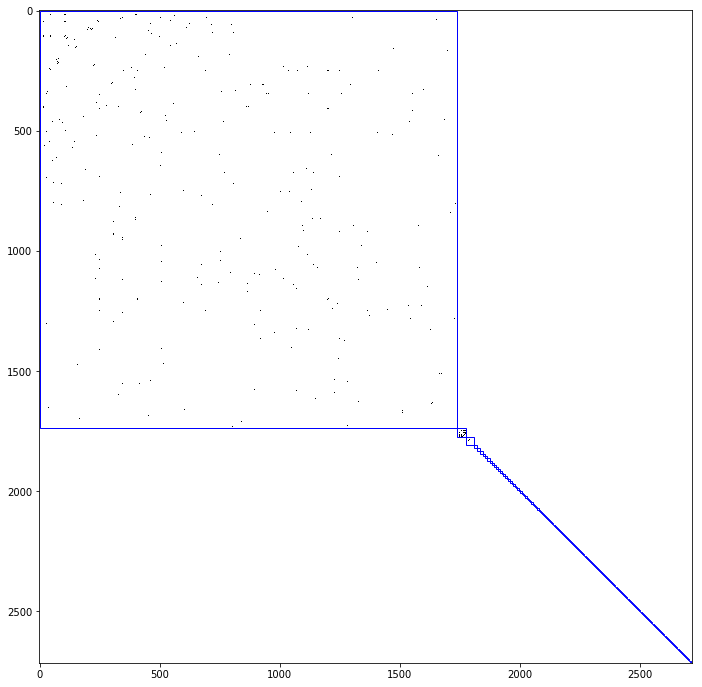

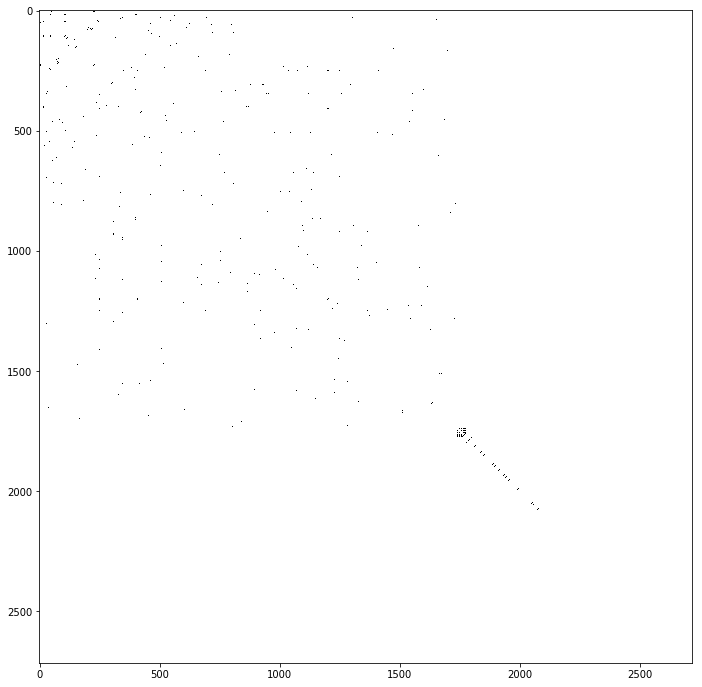

In [114]:
A = adj_2.todense()
P = [list(p) for p in nodeslist]

draw_adjacency_matrix(A, partitions=[P], colors=["blue"], size=12)
plt.savefig("nips_adjmat_full.png",  bbox_inches='tight')

draw_adjacency_matrix(A, size=12)
plt.savefig("nips_adjmat_full_noblock.png",  bbox_inches='tight')

In [50]:
communities_generator_rcc = community.girvan_newman(g_rcc)
nodeslist_rcc = sorted([x for x in next(communities_generator_rcc)], key=len, reverse=True)
nodes_rcc = []
for x in nodeslist_rcc:
    nodes_rcc.extend(x)

<Figure size 864x864 with 0 Axes>

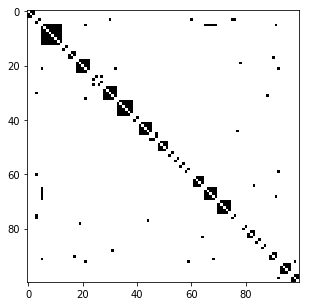

In [67]:
adj_rcc_2 = nx.adjacency_matrix(g_rcc, nodelist=nodes_rcc)

A = adj_rcc_2.todense()[:adjmat_size,:adjmat_size]

plt.figure(figsize = (12, 12))
draw_adjacency_matrix(A)

plt.savefig("rcc_adjmat_zoom.png",  bbox_inches='tight')

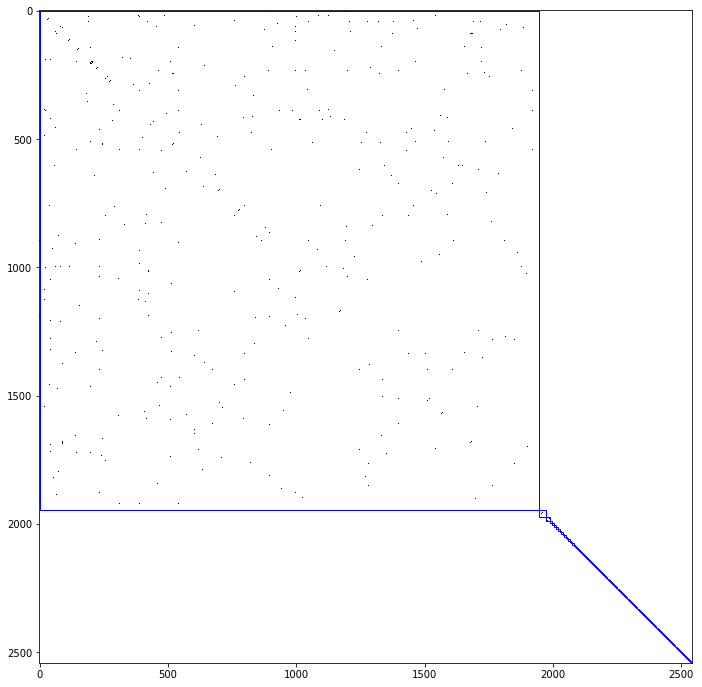

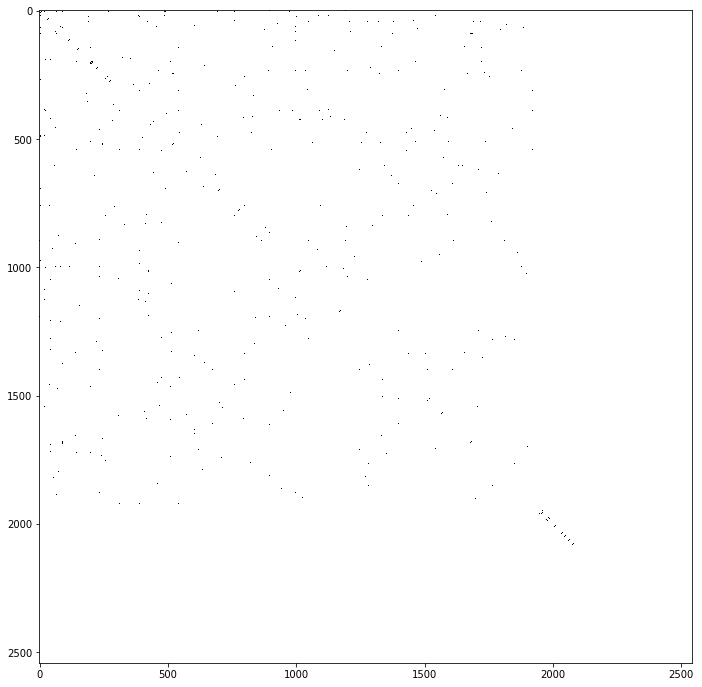

In [115]:
A = adj_rcc_2.todense()
P = [list(p) for p in nodeslist_rcc]

draw_adjacency_matrix(A, partitions=[P], colors=["blue"], size=12)
plt.savefig("rcc_adjmat_full.png",  bbox_inches='tight')

draw_adjacency_matrix(A, size=12)
plt.savefig("rcc_adjmat_full_noblock.png",  bbox_inches='tight')
# plt.close()

In [54]:
communities_generator_bnp = community.girvan_newman(g_bnp)
nodeslist_bnp = sorted([x for x in next(communities_generator_bnp)], key=len, reverse=True)
nodes_bnp = []
for x in nodeslist_bnp:
    nodes_bnp.extend(x)

<Figure size 864x864 with 0 Axes>

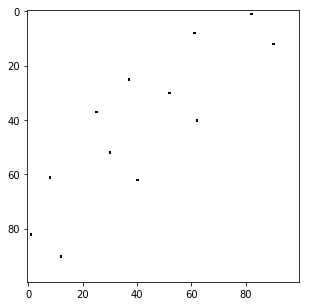

In [68]:
adj_bnp_2 = nx.adjacency_matrix(g_bnp, nodelist=nodes_bnp)

A = adj_bnp_2.todense()[:adjmat_size,:adjmat_size]

draw_adjacency_matrix(A)

plt.savefig("bnp_adjmat_zoom.png",  bbox_inches='tight')

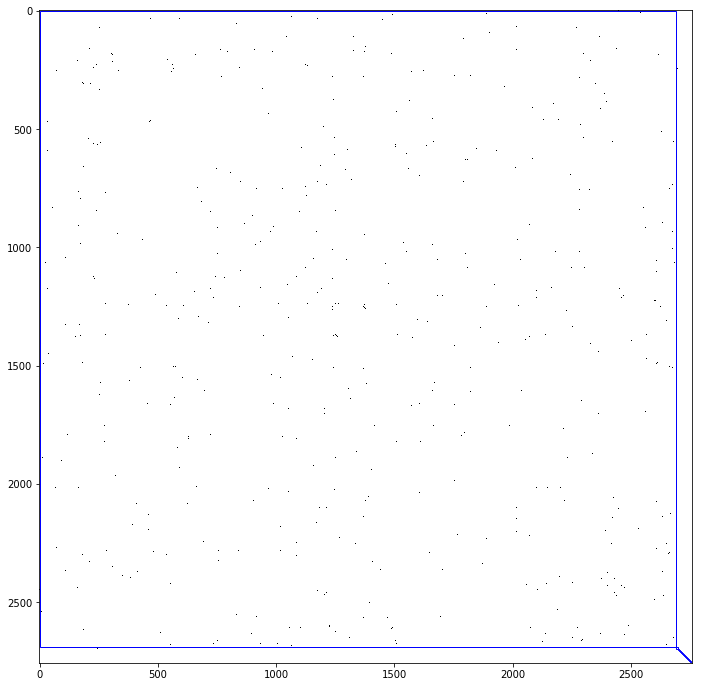

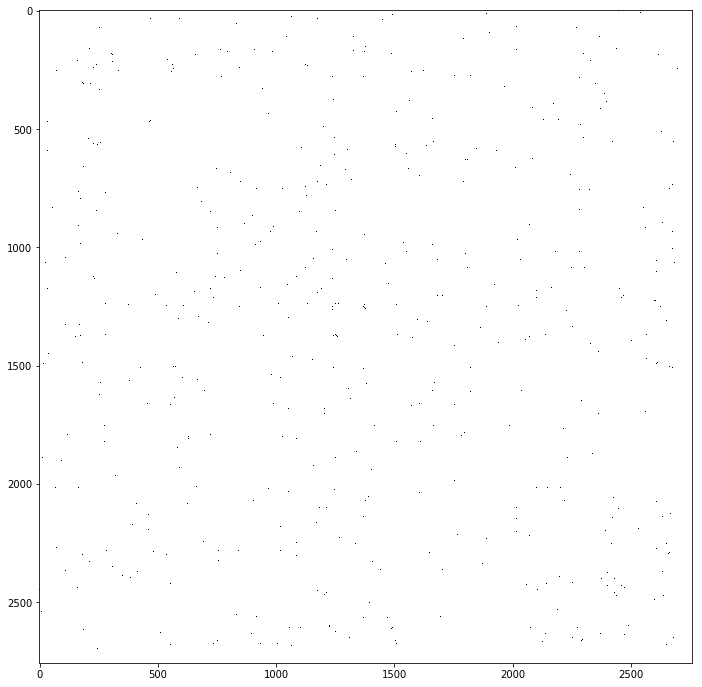

In [116]:
A = adj_bnp_2.todense()
P = [list(p) for p in nodeslist_bnp]


draw_adjacency_matrix(A, partitions=[P], colors=["blue"], size=12)
plt.savefig("bnp_adjmat_full.png",  bbox_inches='tight')

draw_adjacency_matrix(A, size=12)
plt.savefig("bnp_adjmat_full_noblock.png",  bbox_inches='tight')
# plt.close()

In [70]:
communities_generator_kron = community.girvan_newman(g_kron)
nodeslist_kron = sorted([x for x in next(communities_generator_kron)], key=len, reverse=True)
nodes_kron = []
for x in nodeslist_kron:
    nodes_kron.extend(x)

<Figure size 864x864 with 0 Axes>

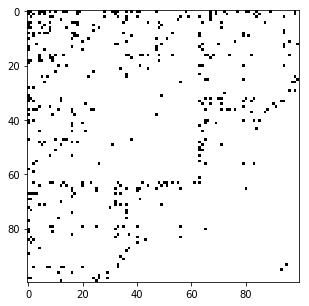

In [81]:
adj_kron_2 = nx.adjacency_matrix(g_kron, nodelist=nodes_kron)
A = adj_kron_2.todense()[:adjmat_size,:adjmat_size]
plt.figure(figsize = (12, 12))
draw_adjacency_matrix(A)
plt.savefig("kron_adjmat_zoom.png",  bbox_inches='tight')

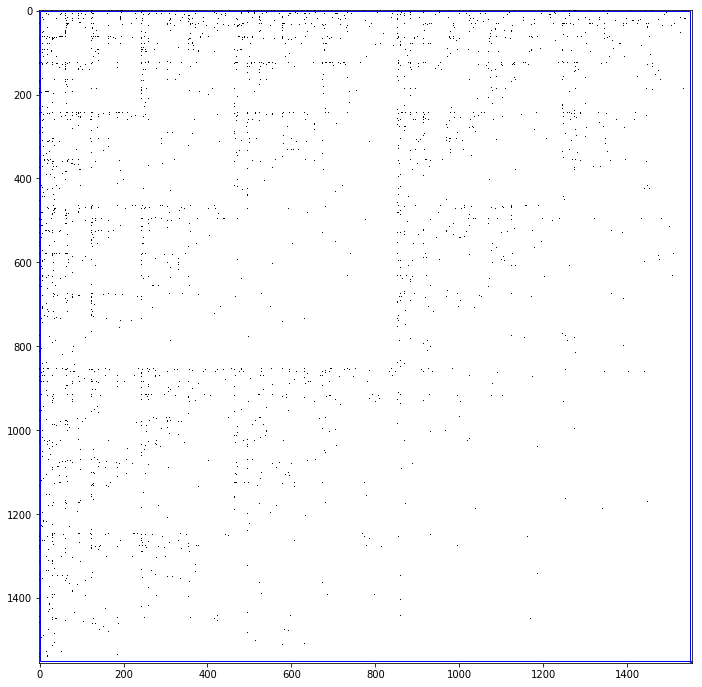

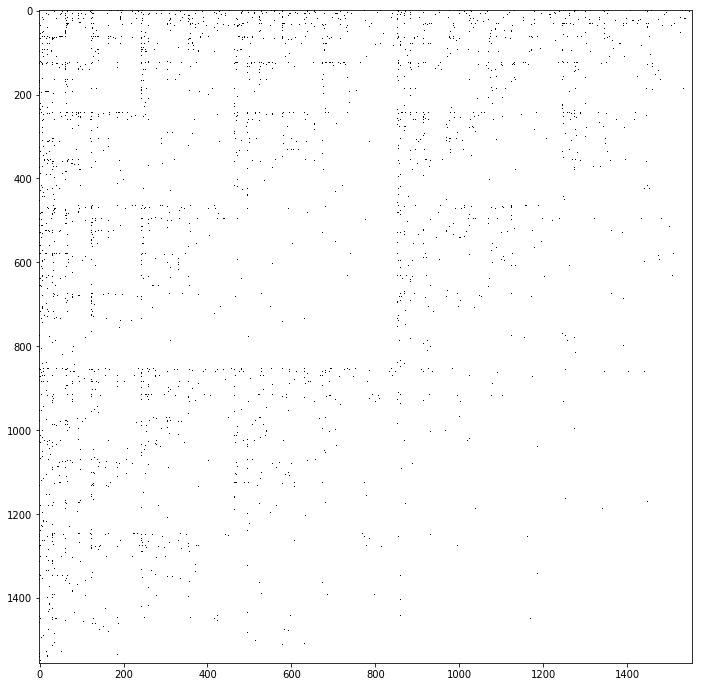

In [117]:
A = adj_kron_2.todense()
P = [list(p) for p in nodeslist_kron]

draw_adjacency_matrix(A, partitions=[P], colors=["blue"], size=12)
plt.savefig("kron_adjmat_full.png",  bbox_inches='tight')

draw_adjacency_matrix(A, size=12)
plt.savefig("kron_adjmat_noblock.png",  bbox_inches='tight')

## Networks

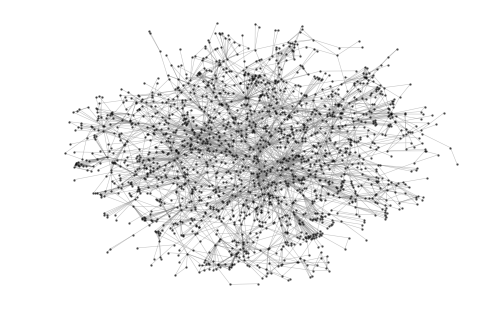

In [6]:
comps = sorted(nx.connected_component_subgraphs(g), 
               key=lambda x: x.number_of_nodes(), 
               reverse=True)
pos=nx.spring_layout(comps[0], k=0.08)
nx.draw(comps[0], pos=pos, edge_color="grey", 
        node_color="black", node_size=2,
        alpha=0.5, width=0.5)
# plt.savefig("network_nips.png",  bbox_inches='tight')

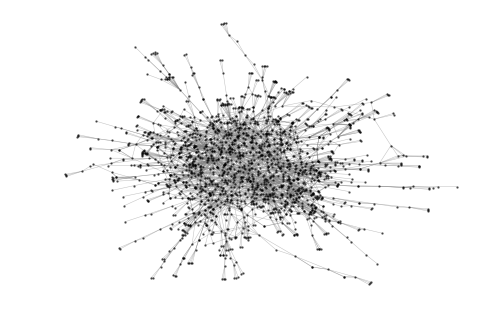

In [9]:
comps_rcc = sorted(nx.connected_component_subgraphs(g_rcc), 
               key=lambda x: x.number_of_nodes(), 
               reverse=True)

nx.draw(comps_rcc[0], edge_color="grey", 
        node_color="black", node_size=2,
        alpha=0.5, width=0.5)
plt.savefig("network_rcc.png",  bbox_inches='tight')

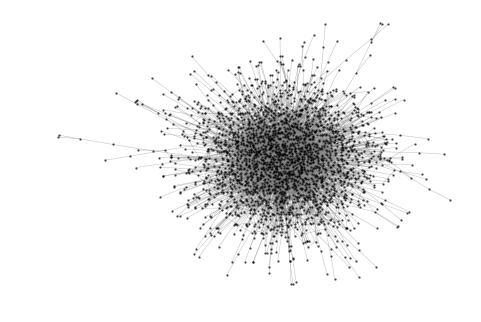

In [7]:
comps_bnp = sorted(nx.connected_component_subgraphs(g_bnp), 
               key=lambda x: x.number_of_nodes(), 
               reverse=True)

pos=nx.spring_layout(comps_bnp[0], k=0.08)
nx.draw(comps_bnp[0], post=pos, edge_color="grey", 
        node_color="black", node_size=2,
        alpha=0.5, width=0.5)
plt.savefig("network_bnp.png",  bbox_inches='tight')

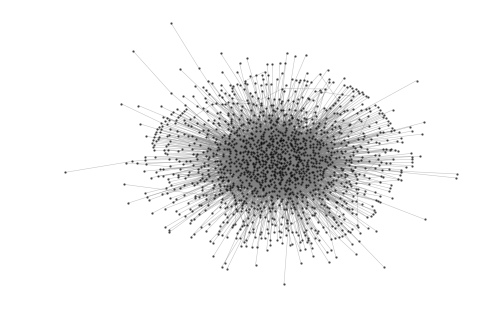

In [8]:
comps_kron = sorted(nx.connected_component_subgraphs(g_kron), 
               key=lambda x: x.number_of_nodes(), 
               reverse=True)
pos=nx.spring_layout(comps_kron[0], k=0.08)
nx.draw(comps_kron[0], pos=pos, edge_color="grey", 
        node_color="black", node_size=2,
        alpha=0.5, width=0.5)
plt.savefig("network_kron.png",  bbox_inches='tight')

In [222]:
Z = sd.sample_from_ibp(K=10000, alpha=5, c=1, sigma=.99)

In [225]:
adjZ = Z.transpose() @ Z
gZ = nx.from_scipy_sparse_matrix(adjZ)
for n in gZ.nodes():
    gZ.remove_edge(n, n)

In [226]:
gZ.number_of_nodes()

46050

In [227]:
gZ.number_of_edges()

123143

In [228]:
Z

<10000x46050 sparse matrix of type '<class 'numpy.int32'>'
	with 49752 stored elements in Compressed Sparse Row format>